<a href="https://colab.research.google.com/github/MK316/Class_Spring2022/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📖 Week09 (6/7, Tuesday)

## #️⃣ Todo list:
1. Reading chapter: Chapter 6 Money and trade
2. Learning goals: 
* **Vocabulary** learning with sounds (N, V, Adj, Adv)
* Grammar: **verb tense** review practice
* Class activities with **English expressions**
* **Phonics - part 1**

## **[1] Chapter 06 Preview**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


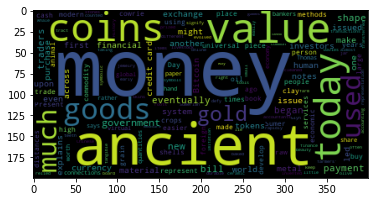

In [26]:
#@markdown 🔳 Wordcloud to show Ch06 content
import nltk
nltk.download("punkt")
nltk.download('gutenberg')

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(text) 
plt.imshow(wc)

## **[2] Word reading**

In [27]:
#@markdown 🚩 Paste the text in the box:
#@markdown File reading: (ch06.txt > text)

# copy a file from github

text = input()

About 9,500 years ago, ancient accountants in Sumer invented a way to keep tract of farmers' crops and livestock. They began using small pieces of baked clay, almost like the tokens used in board games today. One piece might signify a measure of grain, while another with a different shape might represent a farm animal or a jar of olive oil. Those little ceramic shapes might not seem to have much in common with today's $100 bill - or with the credit cards and online transactions that have rapidly taking the place of cash - but the roots of our modern methods of payment lie in those Sumerian tokens. Such early accounting tools evolved into a system of finance and into money itself: a symbolic representation of value that can be transferred from one person to another as payment for goods or services. Since ancient times, humans have used items to represent value - from stones to animal skins, to whale teeth. In the ancient world, people often relied upon symbols that had tangible value in

In [1]:
#@markdown 🚩 {gTTS} package installation and import
%%capture
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

In [109]:
#@markdown 🚩 Getting ready to use { tts ( _text_to_say_) }:
def tts(mytext):

#Install gTTS
# !pip install gTTS
# from gtts import gTTS
# from IPython.display import Audio

  text_to_say = mytext

# Step ⓵ Language to choose:
  language_to_choose = "en" #@param ["en", "fr","ko",'es']
  Slow_speed = "True" #@param ["True","False"]
  # lang = language_to_choose

  print("Play language accent: %s"%language_to_choose)
  language = language_to_choose

# gTTS
  gtts_object = gTTS(text = text_to_say,
                     lang = language,
                    slow = Slow_speed)
  
# #@markdown Step ③: Create the audio file (.wav) to play:
  gtts_object.save("mytext.wav")

# # Output
  return Audio("mytext.wav")

https://raw.githubusercontent.com/MK316/Class_Spring2022/main/ch6.txt

In [58]:
#@markdown 🔳 Import packages: {nltk}, stopwords
%%capture
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("punkt")

from nltk.corpus import stopwords
nltk.download("stopwords")

#@markdown 🔳 Remove stopwords

words = word_tokenize(text)
words = [w for w in words if len(w) > 1]
print('Total number of words before stopwords: %d'%len(words))

# words into lower case
wlist = []
for w in words:
  w1 = w.lower()
  wlist.append(w1)

words = wlist

words = [w for w in words if not w in stopwords.words('english')]
print('Total number of words after stopwords: %d'%len(words))

# Remove 's
words = [w for w in words if len(w)>2]
words

txt = ' '.join(words)

#@markdown 🔳 POS tagging and dataframe (df)
sub1 = list(data['Words'])

wlist = []
cat = []
for w in sub1:
  w1 = w.split("_")
  wlist.append(w1[0])
  cat.append(w1[1])
wlist

import pandas as pd

df = pd.DataFrame()

df["WORD"] = wlist
df['POS'] = cat

df1 = df.sort_values(by = ['POS'])
df1

df1['ID'] = range(1,len(wlist)+1)
df = df1.reindex(['ID','POS','WORD'], axis=1)
df.to_csv('mydata.csv', index=False)
df

In [110]:
#@markdown 🔳 Word reading:

wlist = list(df['WORD'])

wlist1 = ".  ".join(wlist)

tts(wlist1)



Play language accent: en


In [130]:
#@markdown 🔳 Target words to learn pronunciation:

vowel_in_word = "U_good" #@param ["i_piece", "I_skin", "u_root", "U_good"]

ivowel = ["piece", "need","meet", "seat","see","bean","mean","lead","believe","meal"]
iv = ".  ".join(ivowel)
uvowel = ["root","mood","who","rule","afternoon","food","suit","balloon","cool","moon"]
uv = ".  ".join(uvowel)
Ivowel = ["skin","fit","bit","hit","sit","little","silk","milk","hill","ill"]
Iv = ".  ".join(Ivowel)
Uvowel = ["good","book","cook","would","could","should","wood","wolf","woman","put"]
Uv = ".  ".join(Uvowel)
vlist = {'i_piece': iv, 'I_skin': Iv, 'u_root': uv, 'U_good': Uv}

text_to_say1 = vlist.get(vowel_in_word)
intro = "I'll be saying ten words that share the same vowel. Listen carefully. "

text_to_say = intro + text_to_say1
print(vlist[vowel_in_word])
tts(text_to_say)


good.  book.  cook.  would.  could.  should.  wood.  wolf.  woman.  put
Play language accent: en


In [132]:
twowords = input()
tts(twowords)

piece and piss. piss and piece
Play language accent: en


## **[3] Sentence reading (3) and expressions**

In [89]:
#@markdown 🔳 Sentence readings:

from nltk.tokenize import sent_tokenize
sents = sent_tokenize(text)
len(sents)

sent_id = "5"  #@param = [1, 2, 3, 4, 5, 6, 7]
sent_id = int(sent_id)
intro = "Okay, let me read the sentence for you. Listen carefully."

text_to_say = sents[sent_id-1]

text_to_say1 = intro + text_to_say
tts(text_to_say1)

Play language accent: en


In [92]:
#@markdown 🔳 Whole sentence reading:
text_to_read = "Let me read the whole sentences now. Here it goes. " + text

tts(text_to_read)

Play language accent: en
